Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Unique Species: ['iris-setosa' 'iris-versicolor' 'iris-virginica']
Dataset size after filtering: 100 rows


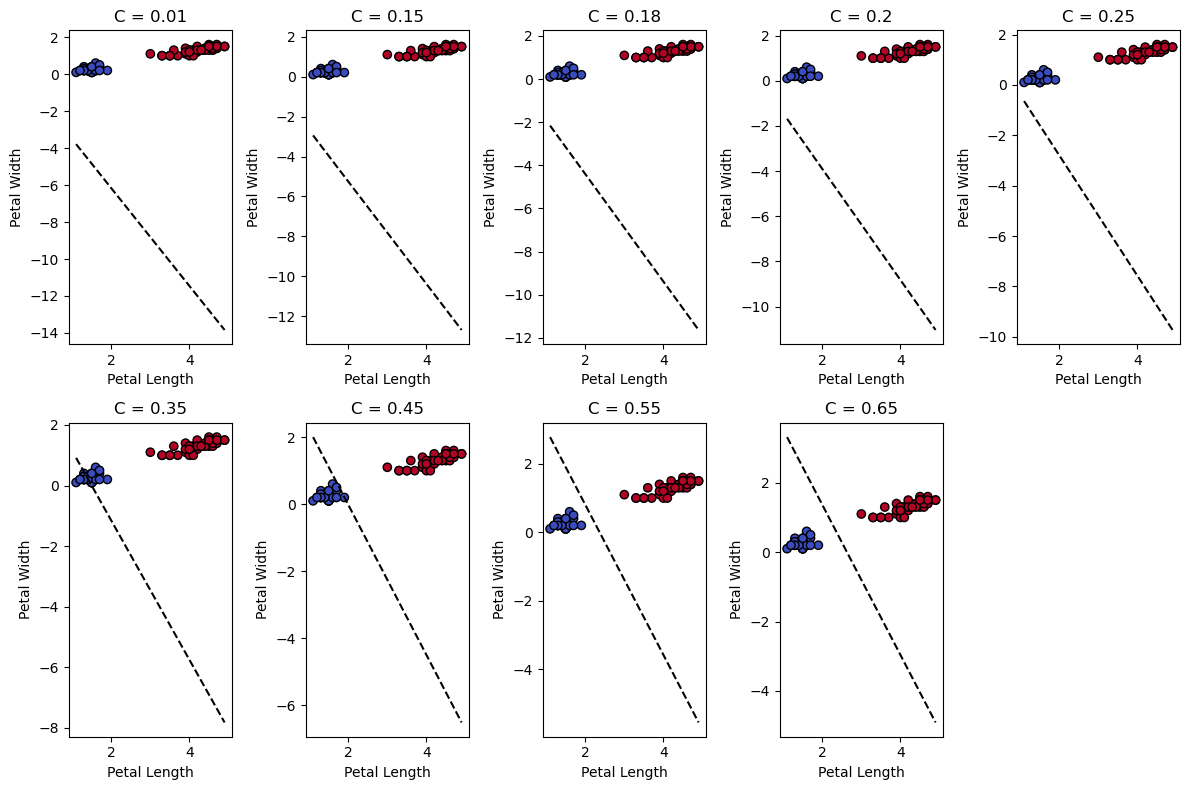

Final Model Accuracy with C=0.46: 95.00%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset from CSV
data = pd.read_csv('Iris.csv')  # Ensure dataset has 'PetalLengthCm', 'PetalWidthCm', 'Species'

# Convert Species column to lowercase to avoid case mismatch
data['Species'] = data['Species'].str.lower()

# Check column names and unique species
print("Columns:", data.columns)
print("Unique Species:", data['Species'].unique())

# Filter Setosa and Versicolor classes based on actual names in dataset
data = data[data['Species'].isin(['iris-setosa', 'iris-versicolor'])]

# Check dataset size after filtering
print(f"Dataset size after filtering: {data.shape[0]} rows")

if data.shape[0] == 0:
    raise ValueError("Filtered dataset is empty. Check species names in CSV.")

X = data[['PetalLengthCm', 'PetalWidthCm']].values
y = np.where(data['Species'] == 'iris-setosa', -1, 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM class
class SVM:
    def __init__(self, C=1.0, lr=0.01, epochs=1000):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.w = np.zeros(X_train.shape[1])
        self.b = 0

    def fit(self, X, y):
        for _ in range(self.epochs):
            margin = y * (X @ self.w + self.b)
            mask = margin < 1
            self.w -= self.lr * (self.w - self.C * (X.T @ (mask * y)) / len(y))
            self.b -= self.lr * (-self.C * np.sum(mask * y) / len(y))

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

    def decision_boundary(self, X):
        return (-self.b - self.w[0] * X) / self.w[1]

# Train and evaluate SVM for different C values
C_values = [0.01, 0.15,0.18,0.20,0.25,0.35,0.45,0.55,0.65]
plt.figure(figsize=(12, 8))
for i, C in enumerate(C_values, 1):
    svm = SVM(C=C, lr=0.01, epochs=1000)
    svm.fit(X_train, y_train)
    
    plt.subplot(2, 5, i)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
    x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    y_vals = svm.decision_boundary(x_vals)
    plt.plot(x_vals, y_vals, 'k--')
    plt.title(f'C = {C}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

# Train final model with best C and evaluate
best_C = 0.46  # Choose based on observations
svm_final = SVM(C=best_C, lr=0.01, epochs=1000)
svm_final.fit(X_train, y_train)
y_pred = svm_final.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Final Model Accuracy with C={best_C}: {accuracy * 100:.2f}%")
